In [93]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [94]:
# Carregar o conjunto de dados MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Separar os atributos (features) e as labels (rótulos)
X_mnist = mnist.data.astype('float64')
y_mnist = mnist.target.astype('int64')

X_train, X_test, y_train, y_test = train_test_split(X_mnist, y_mnist, test_size=0.2, random_state=42)

# Aplicar PCA apenas aos dados de treinamento
pca_mnist = PCA(n_components=20)
X_train_pca = pca_mnist.fit_transform(X_train)
X_test_pca = pca_mnist.transform(X_test)

In [95]:
print(pca_mnist.explained_variance_ratio_)

[0.09758723 0.07155354 0.06171034 0.05394776 0.048991   0.04309514
 0.03269745 0.02888751 0.02754081 0.02337461 0.02117142 0.02030007
 0.01711932 0.01699316 0.01580967 0.01482573 0.013142   0.01278899
 0.01184953 0.01155218]


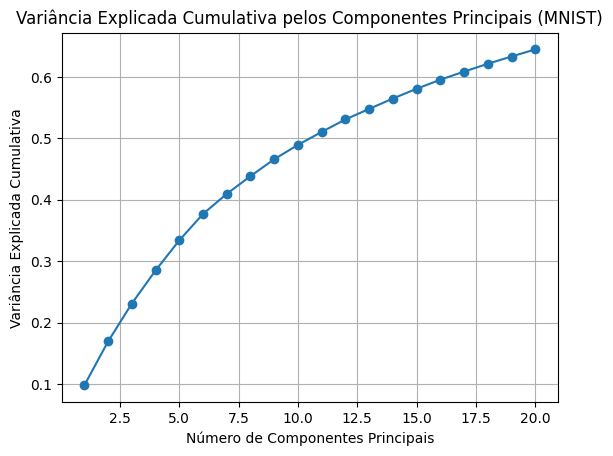

In [102]:
# Calcular a variância explicada acumulada
explained_variance_ratio_cumulative = pca_mnist.explained_variance_ratio_.cumsum()

# Plotar o gráfico de linha
plt.plot(range(1, len(explained_variance_ratio_cumulative) + 1), explained_variance_ratio_cumulative, marker='o', linestyle='-')
plt.title('Variância Explicada Cumulativa pelos Componentes Principais (MNIST)')
plt.xlabel('Número de Componentes Principais')
plt.ylabel('Variância Explicada Cumulativa')
plt.grid(True)
plt.show()

In [97]:
# import matplotlib.pyplot as plt
# plt.scatter(X_mnist_pca[:, 0], X_mnist_pca[:, 1])
# plt.show()

In [98]:
from sklearn.decomposition import PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_mnist)
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_mnist)

In [99]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# fig = plt.figure(figsize=(12, 6))
# fig.suptitle('MNIST Visualization')
# # Plot the 2D projection
# ax1 = fig.add_subplot(121)
# ax1.title.set_text('PCA-2D')
# scatter1 = ax1.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_mnist, cmap='Set1')
# legend1 = ax1.legend(*scatter1.legend_elements(), title='Digits')
# # Plot the 3D projection
# ax2 = fig.add_subplot(122, projection='3d')
# ax2.title.set_text('PCA-3D')
# scatter2 = ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=y_mnist, cmap='Set1')
# legend2 = ax2.legend(*scatter2.legend_elements(), title='Digits')
# plt.tight_layout()
# plt.show()

In [100]:
# Treinar um classificador k-NN
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_pca, y_train)

# Fazer previsões
y_pred = knn_classifier.predict(X_test_pca)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia knn PCA:", accuracy)

Acurácia knn PCA: 0.9689285714285715


In [101]:
# Treinar um classificador k-NN
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Fazer previsões
y_pred = knn_classifier.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia knn SEM PCA:", accuracy)

Acurácia knn SEM PCA: 0.9700714285714286
